# Home Credit Default Risk (HCDR)

The course project is based on the [Home Credit Default Risk (HCDR)  Kaggle Competition](https://www.kaggle.com/c/home-credit-default-risk/). The goal of this project is to predict whether or not a client will repay a loan. In order to make sure that people who struggle to get loans due to insufficient or non-existent credit histories have a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.


## Some of the challenges

1. Dataset size 
   * (688 meg uncompressed) with millions of rows of data
   * 2.71 Gig of data uncompressed
* Dealing with missing data
* Imbalanced datasets
* Summarizing transaction data


# Kaggle API setup
Kaggle is a Data Science Competition Platform which shares a lot of datasets. In the past, it was troublesome to submit your result as your have to go through the console in your browser and drag your files there. Now you can interact with Kaggle via the command line. E.g., 

```bash
! kaggle competitions files home-credit-default-risk
```

It is quite easy to setup, it takes me less than 15 minutes to finish a submission.

1. Install library
* Create a API Token (edit your profile on [Kaggle.com](https://www.kaggle.com/)); this produces `kaggle.json` file
* Put your JSON `kaggle.json` in the right place
* Access competition files; make submissions via the command (see examples below)
* Submit result

For more detailed information on setting the Kaggle API see [here](https://medium.com/@nokkk/make-your-kaggle-submissions-with-kaggle-official-api-f49093c04f8a) and [here](https://github.com/Kaggle/kaggle-api).



In [1]:
'''!pip install kaggle

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-1-a31691e03bd8>, line 1)

In [ ]:
'''!pwd


In [ ]:
'''!mkdir /home/ec2-user/SageMaker/Unit-Project-Home-Credit-Default-Risk/.kaggle

In [2]:
'''!cp /home/ec2-user/SageMaker/Unit-Project-Home-Credit-Default-Risk/kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-2-5b081f9cf08b>, line 2)

In [ ]:
'''! kaggle competitions files ./.kaggle

# Dataset and how to download


## Back ground Home Credit Group

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

### Home Credit Group

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.


## Background on the dataset
Home Credit is a non-banking financial institution, founded in 1997 in the Czech Republic.

The company operates in 14 countries (including United States, Russia, Kazahstan, Belarus, China, India) and focuses on lending primarily to people with little or no credit history which will either not obtain loans or became victims of untrustworthly lenders.

Home Credit group has over 29 million customers, total assests of 21 billions Euro, over 160 millions loans, with the majority in Asia and and almost half of them in China (as of 19-05-2018).

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

## Data files overview
There are 7 different sources of data:

* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.
* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

![alt](home_credit.png "Home credit")

## Downloading the files via Kaggle API

Create a base directory:

```bash
DATA_DIR = "../../../Data/home-credit-default-risk"   #same level as course repo in the data directory
```

Please download the project data files and data dictionary and unzip them using either of the following approaches:

1. Click on the `Download` button on the following [Data Webpage](https://www.kaggle.com/c/home-credit-default-risk/data) and unzip the  zip file to the `BASE_DIR`
2. If you plan to use the Kaggle API, please use the following steps.


In [ ]:
'''DATA_DIR = "../../../Data/home-credit-default-risk"   #same level as course repo in the data directory
#DATA_DIR = os.path.join('./ddddd/')
!mkdir $DATA_DIR

In [ ]:
'''!ls -l $DATA_DIR

In [3]:
'''! kaggle competitions download home-credit-default-risk -p $DATA_DIR

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-3-43c52328ca3b>, line 1)

### Imports

In [ ]:
'''import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [ ]:
'''unzippingReq = False
if unzippingReq: #please modify this code 
    zip_ref = zipfile.ZipFile('application_train.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('application_test.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('bureau_balance.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('bureau.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('credit_card_balance.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('installments_payments.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('POS_CASH_balance.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('previous_application.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()

## Data files overview
### Data Dictionary

As part of the data download comes a  Data Dictionary. It named `HomeCredit_columns_description.csv`

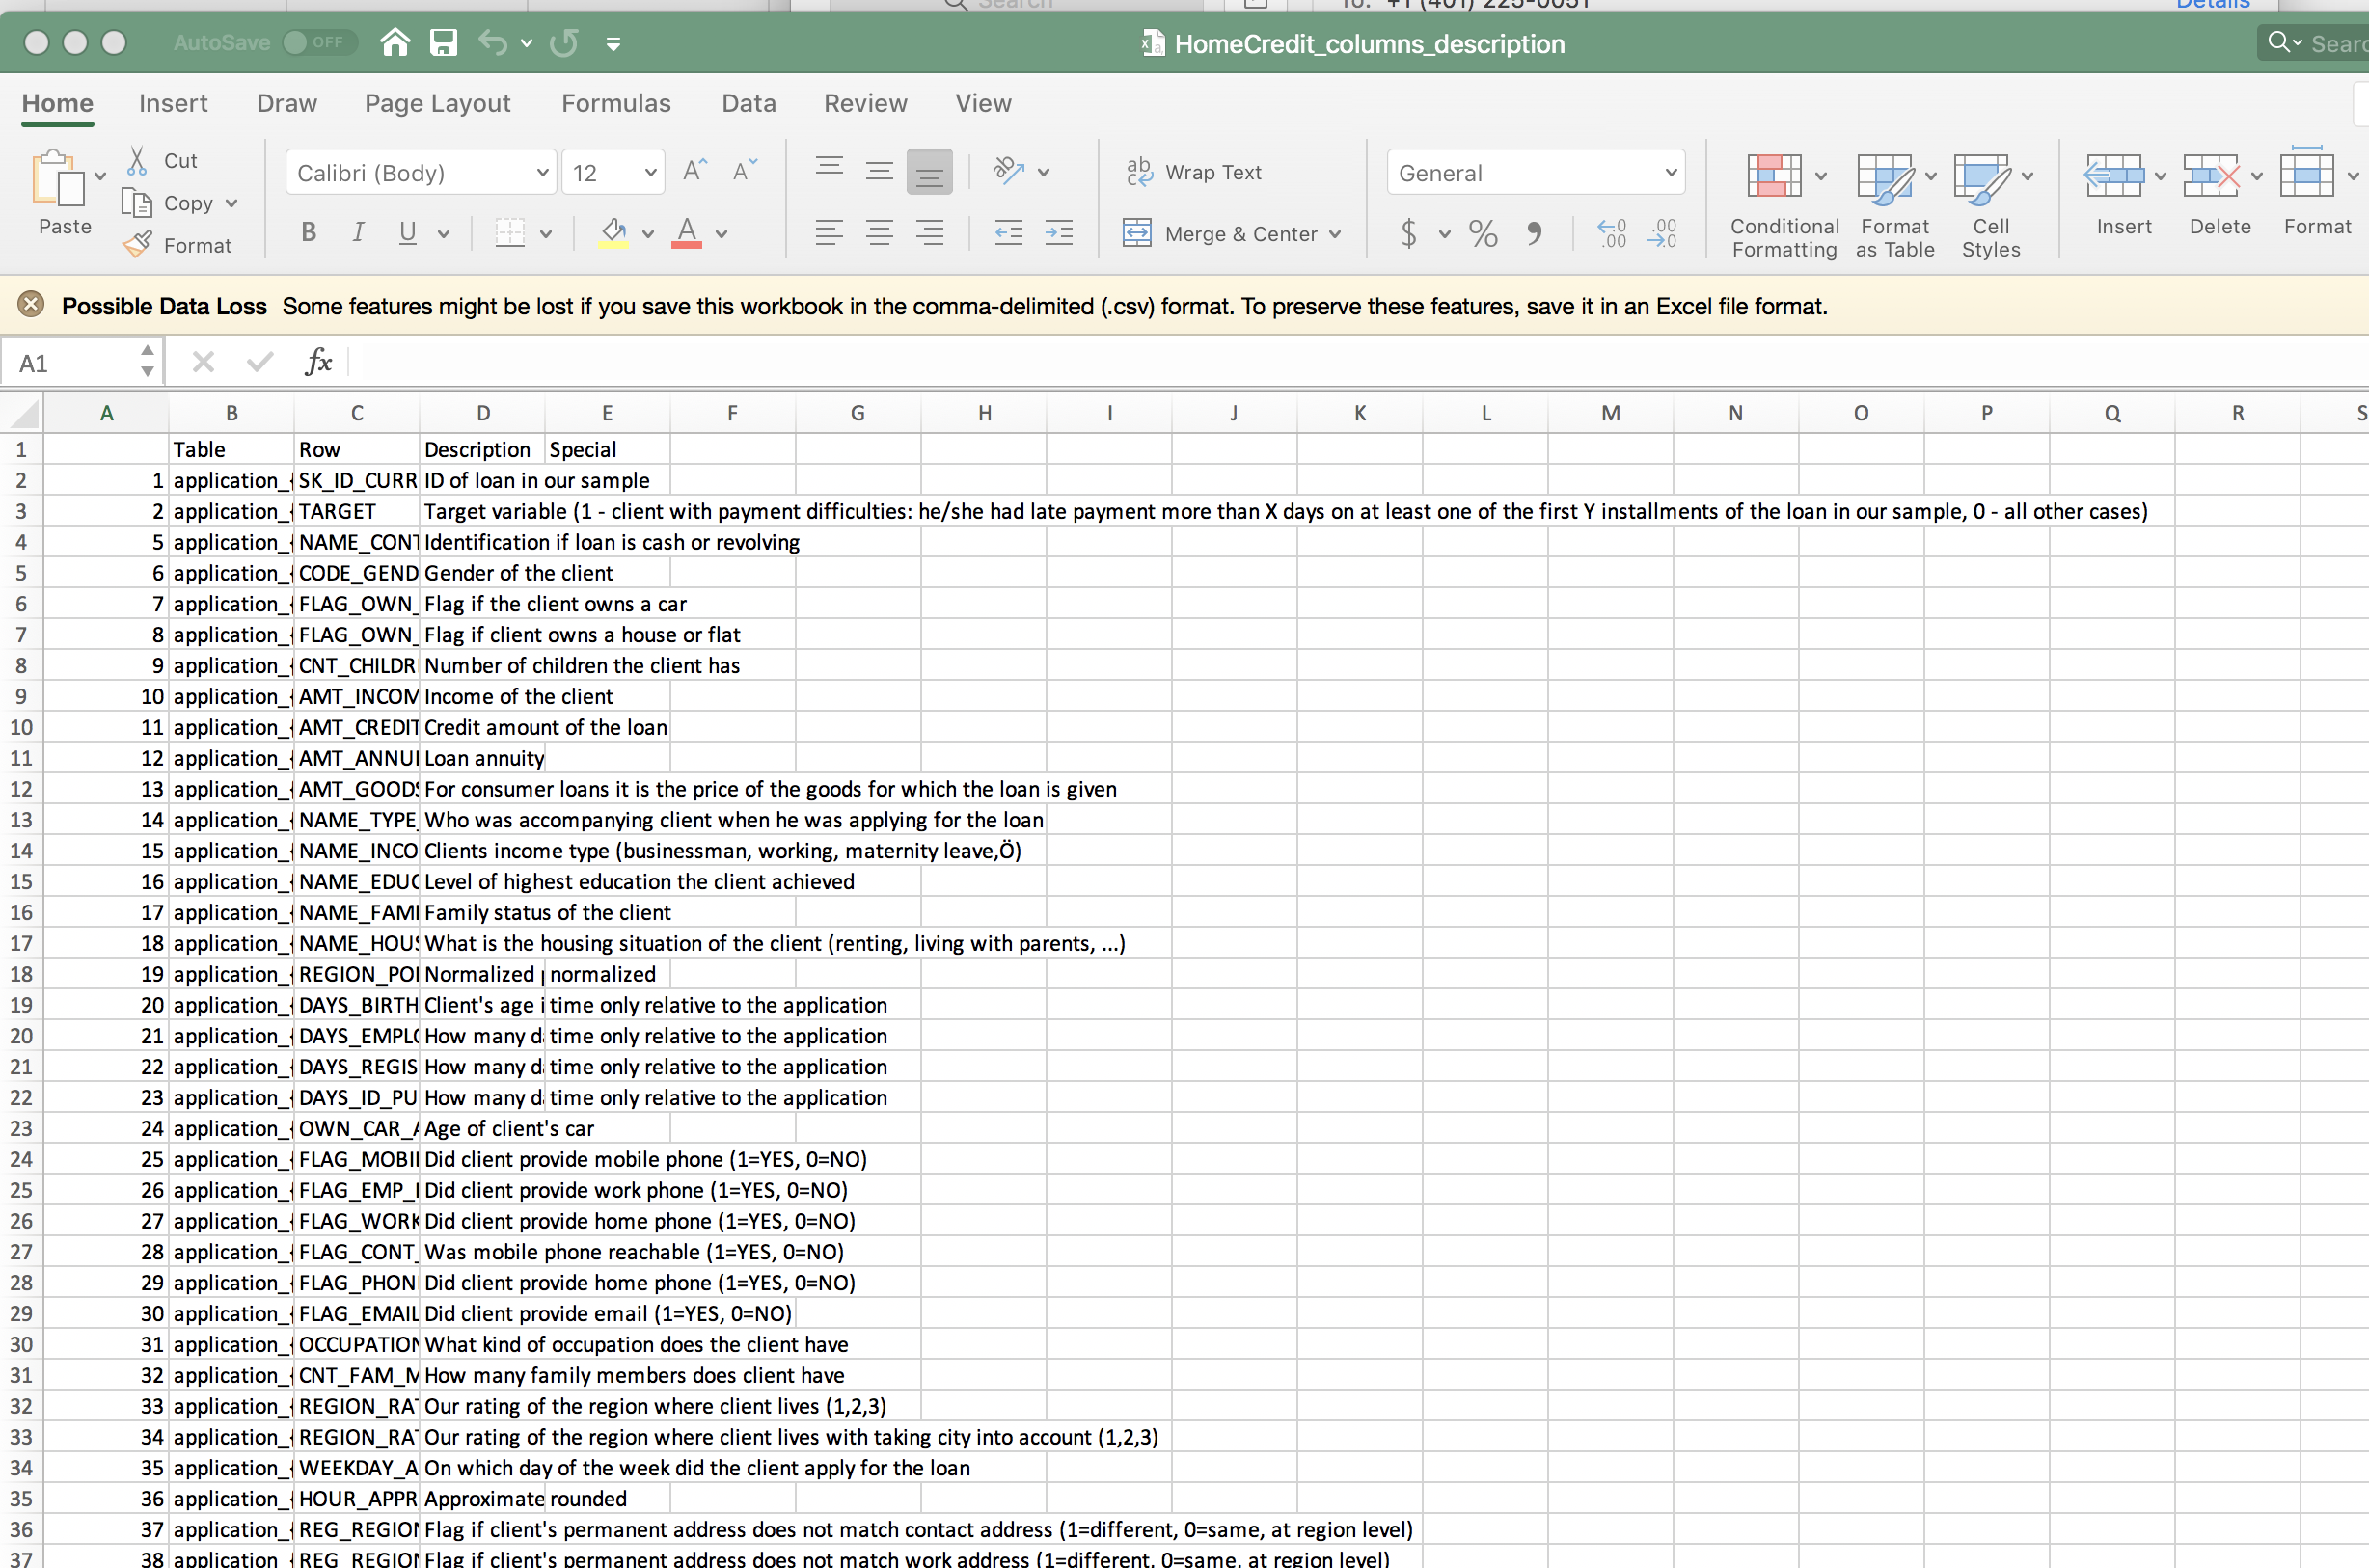

### Application train

In [4]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [5]:
def load_data(in_path, name):
    df = pd.read_csv(in_path)
    print(f"{name}: shape is {df.shape}")
    print(df.info())
    display(df.head(5))
    return df

DATA_DIR = "C:/Users/mjohn407/Documents/Class/ML/Final/home-credit-default-risk"
datasets={}  # lets store the datasets in a dictionary so we can keep track of them easily
ds_name = 'application_train'
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

datasets['application_train'].shape

application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


(307511, 122)

### Application test


* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.


In [6]:
ds_name = 'application_test'
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


The application dataset has the most information about the client: Gender, income, family status, education ...

### The Other datasets

* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

In [7]:
%%time
ds_names = ("application_train", "application_test", "bureau","bureau_balance","credit_card_balance","installments_payments",
            "previous_application","POS_CASH_balance")

for ds_name in ds_names:
    datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)


application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


bureau: shape is (1716428, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
SK_ID_CURR                int64
SK_ID_BUREAU              int64
CREDIT_ACTIVE             object
CREDIT_CURRENCY           object
DAYS_CREDIT               int64
CREDIT_DAY_OVERDUE        int64
DAYS_CREDIT_ENDDATE       float64
DAYS_ENDDATE_FACT         float64
AMT_CREDIT_MAX_OVERDUE    float64
CNT_CREDIT_PROLONG        int64
AMT_CREDIT_SUM            float64
AMT_CREDIT_SUM_DEBT       float64
AMT_CREDIT_SUM_LIMIT      float64
AMT_CREDIT_SUM_OVERDUE    float64
CREDIT_TYPE               object
DAYS_CREDIT_UPDATE        int64
AMT_ANNUITY               float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


bureau_balance: shape is (27299925, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
SK_ID_BUREAU      int64
MONTHS_BALANCE    int64
STATUS            object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


credit_card_balance: shape is (3840312, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
SK_ID_PREV                    int64
SK_ID_CURR                    int64
MONTHS_BALANCE                int64
AMT_BALANCE                   float64
AMT_CREDIT_LIMIT_ACTUAL       int64
AMT_DRAWINGS_ATM_CURRENT      float64
AMT_DRAWINGS_CURRENT          float64
AMT_DRAWINGS_OTHER_CURRENT    float64
AMT_DRAWINGS_POS_CURRENT      float64
AMT_INST_MIN_REGULARITY       float64
AMT_PAYMENT_CURRENT           float64
AMT_PAYMENT_TOTAL_CURRENT     float64
AMT_RECEIVABLE_PRINCIPAL      float64
AMT_RECIVABLE                 float64
AMT_TOTAL_RECEIVABLE          float64
CNT_DRAWINGS_ATM_CURRENT      float64
CNT_DRAWINGS_CURRENT          int64
CNT_DRAWINGS_OTHER_CURRENT    float64
CNT_DRAWINGS_POS_CURRENT      float64
CNT_INSTALMENT_MATURE_CUM     float64
NAME_CONTRACT_STATUS          object
SK_DPD                        int64
SK_DPD_DEF          

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


installments_payments: shape is (13605401, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
SK_ID_PREV                int64
SK_ID_CURR                int64
NUM_INSTALMENT_VERSION    float64
NUM_INSTALMENT_NUMBER     int64
DAYS_INSTALMENT           float64
DAYS_ENTRY_PAYMENT        float64
AMT_INSTALMENT            float64
AMT_PAYMENT               float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


previous_application: shape is (1670214, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOS

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


POS_CASH_balance: shape is (10001358, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
SK_ID_PREV               int64
SK_ID_CURR               int64
MONTHS_BALANCE           int64
CNT_INSTALMENT           float64
CNT_INSTALMENT_FUTURE    float64
NAME_CONTRACT_STATUS     object
SK_DPD                   int64
SK_DPD_DEF               int64
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


Wall time: 59.4 s


In [8]:
for ds_name in datasets.keys():
    print(f'dataset {ds_name:24}: [ {datasets[ds_name].shape[0]:10,}, {datasets[ds_name].shape[1]}]')


dataset application_train       : [    307,511, 122]
dataset application_test        : [     48,744, 121]
dataset bureau                  : [  1,716,428, 17]
dataset bureau_balance          : [ 27,299,925, 3]
dataset credit_card_balance     : [  3,840,312, 23]
dataset installments_payments   : [ 13,605,401, 8]
dataset previous_application    : [  1,670,214, 37]
dataset POS_CASH_balance        : [ 10,001,358, 8]


# Exploratory Data Analysis

## Summary of Application Train and Application Test Datasets

In [9]:
'''datasets["application_train"].info()'''

'datasets["application_train"].info()'

In [10]:
'''datasets["application_train"].describe() #numerical only features'''

'datasets["application_train"].describe() #numerical only features'

In [11]:
'''datasets["application_train"].describe(include='all') #look at all categorical and numerical'''

'datasets["application_train"].describe(include=\'all\') #look at all categorical and numerical'

## Missing Data for Application Train and Test

### Missing percentage and count in application train 

In [12]:
'''percent = (datasets["application_train"].isnull().sum()/datasets["application_train"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["application_train"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Train Missing Count"])
missing_application_train_data.head(20)'''

'percent = (datasets["application_train"].isnull().sum()/datasets["application_train"].isnull().count()*100).sort_values(ascending = False).round(2)\nsum_missing = datasets["application_train"].isna().sum().sort_values(ascending = False)\nmissing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=[\'Percent\', "Train Missing Count"])\nmissing_application_train_data.head(20)'

### Missing percentage and count in application test

In [13]:
'''percent = (datasets["application_test"].isnull().sum()/datasets["application_test"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["application_test"].isna().sum().sort_values(ascending = False)
missing_application_test_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Test Missing Count"])
missing_application_test_data.head(20)'''

'percent = (datasets["application_test"].isnull().sum()/datasets["application_test"].isnull().count()*100).sort_values(ascending = False).round(2)\nsum_missing = datasets["application_test"].isna().sum().sort_values(ascending = False)\nmissing_application_test_data  = pd.concat([percent, sum_missing], axis=1, keys=[\'Percent\', "Test Missing Count"])\nmissing_application_test_data.head(20)'

### Proportion of missing values for columns with more than 40% data missing, across all datasets

In [14]:
'''for data_name in ds_names:
    print ("\033[1mFeatures with more than 40% missing values in \033[94m"+str(data_name)+" dataset \033[0m \n")
    print ("\033[1mFeatures"+ (29-len("Features"))*" "+"Missing proportion"'\033[0m')
    for name in datasets[data_name].columns:
        missing_proportion=datasets[data_name][str(name)].isna().sum()/datasets[data_name].shape[0]*100
        if missing_proportion > 40:
            print (" "+str(name)+":"+ (29-len(str(name)))*" "   +"\033[91m%"+str(np.round(missing_proportion,1)),'\033[0m')
    print()'''

'for data_name in ds_names:\n    print ("\x1bFeatures with more than 40% missing values in \x1b"+str(data_name)+" dataset \x1b \n")\n    print ("\x1bFeatures"+ (29-len("Features"))*" "+"Missing proportion"\'\x1b\')\n    for name in datasets[data_name].columns:\n        missing_proportion=datasets[data_name][str(name)].isna().sum()/datasets[data_name].shape[0]*100\n        if missing_proportion > 40:\n            print (" "+str(name)+":"+ (29-len(str(name)))*" "   +"\x1b%"+str(np.round(missing_proportion,1)),\'\x1b\')\n    print()'

### Number of columns with missing data more or equal to 40% in application train

In [15]:
'''missing_application_train_data[missing_application_train_data['Percent'] >= 40].count()'''

"missing_application_train_data[missing_application_train_data['Percent'] >= 40].count()"

### Number of columns with missing data more or equal to 40% in application test

In [16]:
'''missing_application_test_data[missing_application_test_data['Percent'] >= 40].count()'''

"missing_application_test_data[missing_application_test_data['Percent'] >= 40].count()"

## Breakdown of primary table feature datatypes

In [17]:
'''datasets["application_train"].dtypes.value_counts()'''

'datasets["application_train"].dtypes.value_counts()'

### Categorical Features

In [18]:
cat_features = datasets["application_train"].select_dtypes('object').columns.tolist()
cat_features

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

### Number of unique values for categorical features

In [19]:
'''datasets["application_train"].select_dtypes('object').apply(pd.Series.nunique, axis = 0)'''

'datasets["application_train"].select_dtypes(\'object\').apply(pd.Series.nunique, axis = 0)'

### Value counts of categorical features

In [20]:
'''fig, ax = plt.subplots(4,4, figsize=(21, 21))
fig.subplots_adjust(hspace = .5, wspace=.51)
for c, v in enumerate(cat_features):
    ax = fig.add_subplot(4, 4, c+1)
    sns.countplot(x=v, data=datasets["application_train"])
    plt.xticks(rotation = 45)
    plt.xlabel(v)'''

'fig, ax = plt.subplots(4,4, figsize=(21, 21))\nfig.subplots_adjust(hspace = .5, wspace=.51)\nfor c, v in enumerate(cat_features):\n    ax = fig.add_subplot(4, 4, c+1)\n    sns.countplot(x=v, data=datasets["application_train"])\n    plt.xticks(rotation = 45)\n    plt.xlabel(v)'

### Numerical Features

In [21]:
num_features = datasets["application_train"].select_dtypes(include=['float64', 'int']).columns.tolist()
num_features

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_M

## Distribution of the target column 

In [22]:
'''datasets["application_train"]['TARGET'].value_counts()'''

'datasets["application_train"][\'TARGET\'].value_counts()'

In [23]:
'''datasets["application_train"]['TARGET'].astype(int).plot.hist();'''

'datasets["application_train"][\'TARGET\'].astype(int).plot.hist();'

* If both levels of target feature are more than 10%, logistic regression classifier would be an overestimate the coefficients. Let's look at the proportions of target variable

In [24]:
'''print ("Percentage of target levels:")
print (np.round(datasets["application_train"]['TARGET'].value_counts()/datasets["application_train"].shape[0]*100),1)'''

'print ("Percentage of target levels:")\nprint (np.round(datasets["application_train"][\'TARGET\'].value_counts()/datasets["application_train"].shape[0]*100),1)'

Only __8%__ of clients failed to repay on time. We have much more loans that repaid on time other than the not repaid on time. So, we have a inbalanced target distribution. 

## Correlation with  the target column 

In [25]:
'''correlations = datasets["application_train"].corr(method="spearman")['TARGET'].sort_values(ascending=False)
print('Most Positive Correlations:\n', correlations.head(10))
print('\nMost Negative Correlations:\n', correlations.tail(10).sort_values(ascending=True))'''

'correlations = datasets["application_train"].corr(method="spearman")[\'TARGET\'].sort_values(ascending=False)\nprint(\'Most Positive Correlations:\n\', correlations.head(10))\nprint(\'\nMost Negative Correlations:\n\', correlations.tail(10).sort_values(ascending=True))'

From the correlations, we can see that DAYS_BIRTH which indicating the age of the client is most positively correlated with Target, and EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3 are most negtively correlated with Target. we will look more close into those columns and some more column which we think might be important factors for our model. 

In [26]:
'''print ('\033[1m\033[4mCorrelation Heatmap\033[0m'.center(2))

corr_heatmap=correlations.iloc[np.r_[-5:0,0:5]]
corr=pd.DataFrame(corr_heatmap).T.drop(columns="TARGET")

grid_kws = {"height_ratios": (.95, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws)
ax = sns.heatmap(corr, ax=ax,
                  cbar_ax=cbar_ax,vmin=-0.2, vmax=0.1, center=0,
                  cbar_kws={"orientation": "horizontal"},square=True,
                 cmap=sns.diverging_palette(20, 220, n=200),fmt = '')

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=30,
    horizontalalignment='right'
);

ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    horizontalalignment='right'
);



figure = ax.get_figure()    
figure.savefig('ax.png', dpi=900)'''

'print (\'\x1b\x1bCorrelation Heatmap\x1b\'.center(2))\n\ncorr_heatmap=correlations.iloc[np.r_[-5:0,0:5]]\ncorr=pd.DataFrame(corr_heatmap).T.drop(columns="TARGET")\n\ngrid_kws = {"height_ratios": (.95, .05), "hspace": .3}\nf, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws)\nax = sns.heatmap(corr, ax=ax,\n                  cbar_ax=cbar_ax,vmin=-0.2, vmax=0.1, center=0,\n                  cbar_kws={"orientation": "horizontal"},square=True,\n                 cmap=sns.diverging_palette(20, 220, n=200),fmt = \'\')\n\nax.set_xticklabels(\n    ax.get_xticklabels(),\n    rotation=30,\n    horizontalalignment=\'right\'\n);\n\nax.set_yticklabels(\n    ax.get_yticklabels(),\n    rotation=0,\n    horizontalalignment=\'right\'\n);\n\n\n\nfigure = ax.get_figure()    \nfigure.savefig(\'ax.png\', dpi=900)'

## Examining number of days employed of clients

In [27]:
'''datasets["application_train"]['DAYS_EMPLOYED'].plot.hist();
plt.xticks(rotation='vertical')'''

'datasets["application_train"][\'DAYS_EMPLOYED\'].plot.hist();\nplt.xticks(rotation=\'vertical\')'

From the above distribution, we can see that there is anomalous data present in the **DAYS_EMPLOYED** column. We need to replace these with np.nan and impute them later

## Examining statistics by Gender

In [28]:
'''# proportion of participants by gender
datasets["application_train"]['CODE_GENDER'].value_counts()/datasets["application_train"].shape[0]'''

'# proportion of participants by gender\ndatasets["application_train"][\'CODE_GENDER\'].value_counts()/datasets["application_train"].shape[0]'

In [29]:
'''dummies=pd.get_dummies(datasets["application_train"]['CODE_GENDER'])
target=datasets["application_train"]['TARGET']
merged= pd.concat([dummies,target],axis="columns").drop(columns=["M"])
merged=merged.rename(columns={"F": "Gender: 0=Male, 1=Female"})
merged.head(5)'''

'dummies=pd.get_dummies(datasets["application_train"][\'CODE_GENDER\'])\ntarget=datasets["application_train"][\'TARGET\']\nmerged= pd.concat([dummies,target],axis="columns").drop(columns=["M"])\nmerged=merged.rename(columns={"F": "Gender: 0=Male, 1=Female"})\nmerged.head(5)'

In [30]:
'''fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x="Gender: 0=Male, 1=Female", y="TARGET", data=merged)'''

'fig, ax = plt.subplots(figsize=(10,8))\nsns.barplot(x="Gender: 0=Male, 1=Female", y="TARGET", data=merged)'

* Barplot suggests that female clients more frequently repay their loans, compared to male clients

## Examining statistics by Age of Clients 

In [31]:
'''plt.hist(datasets["application_train"]['DAYS_BIRTH'] / -365, edgecolor = 'k', bins ="sturges")
# Plot the distribution of ages in years
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');'''

'plt.hist(datasets["application_train"][\'DAYS_BIRTH\'] / -365, edgecolor = \'k\', bins ="sturges")\n# Plot the distribution of ages in years\nplt.title(\'Age of Client\'); plt.xlabel(\'Age (years)\'); plt.ylabel(\'Count\');'

From the histigram, we can see there are all resonable age values and no outliers. With less clients under about 25 years old and above 65 years old, we have more applicants between 25 years old to 45 years old. But we can't tell much how age will influent the target value. Let's plot the density plots to show the distribution of applicants' age with different target values.   

In [32]:
'''datasets["application_train"]["client_age"]= -datasets["application_train"][['DAYS_BIRTH']]/365
fig, ax = plt.subplots(figsize=(10,8))

datasets["application_train"].boxplot(column=['client_age'], by='TARGET', ax=ax,grid=False, 
                                      showmeans =True )
'''

'datasets["application_train"]["client_age"]= -datasets["application_train"][[\'DAYS_BIRTH\']]/365\nfig, ax = plt.subplots(figsize=(10,8))\n\ndatasets["application_train"].boxplot(column=[\'client_age\'], by=\'TARGET\', ax=ax,grid=False, \n                                      showmeans =True )\n'

The above boxplot indicates that older clients tend to repay the loans more frequently compared to younger clients

## Density Plots for External Sources 

From the density plots, we can see older clients have better records about repaid loans. 

External scource is about "normalized score from external data source". The density plots of these external sources shows how they related with the target value. EXT_SOURCE_1 and EXT_SOURCE_3 show less score related higher failure in repaying loans. EXT_SOURCE_2 does not show obvious difference but it agrees with lower score pointing to high failure rate.

In [33]:
'''plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(datasets["application_train"].loc[datasets["application_train"]['TARGET'] == 0, source].dropna(), label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(datasets["application_train"].loc[datasets["application_train"]['TARGET'] == 1, source].dropna(), label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)'''

'plt.figure(figsize = (10, 12))\n\n# iterate through the sources\nfor i, source in enumerate([\'EXT_SOURCE_1\', \'EXT_SOURCE_2\', \'EXT_SOURCE_3\']):\n    \n    # create a new subplot for each source\n    plt.subplot(3, 1, i + 1)\n    # plot repaid loans\n    sns.kdeplot(datasets["application_train"].loc[datasets["application_train"][\'TARGET\'] == 0, source].dropna(), label = \'target == 0\')\n    # plot loans that were not repaid\n    sns.kdeplot(datasets["application_train"].loc[datasets["application_train"][\'TARGET\'] == 1, source].dropna(), label = \'target == 1\')\n    \n    # Label the plots\n    plt.title(\'Distribution of %s by Target Value\' % source)\n    plt.xlabel(\'%s\' % source); plt.ylabel(\'Density\');\n    \nplt.tight_layout(h_pad = 2.5)'

## Input variables Correlation Test

* Correlation between AMT_ANNUITY and AMT_CREDIT

In [34]:
'''sns.regplot(datasets["application_train"]['AMT_ANNUITY'], datasets["application_train"]['AMT_CREDIT'], color="g", fit_reg=False)'''


'sns.regplot(datasets["application_train"][\'AMT_ANNUITY\'], datasets["application_train"][\'AMT_CREDIT\'], color="g", fit_reg=False)'

From the above plot, the variables AMT_ANUITY and AMT_CREDIT seem to be postively correlated. One of features can be excluded from the final list of input features

## Dataset questions
* Unique record for each SK_ID_CURR

In [35]:
'''datasets.keys()'''

'datasets.keys()'

In [36]:
'''len(datasets["application_train"]["SK_ID_CURR"].unique()) == datasets["application_train"].shape[0]'''

'len(datasets["application_train"]["SK_ID_CURR"].unique()) == datasets["application_train"].shape[0]'

In [37]:
'''#Return the sorted, unique values that are in both of the input arrays.
np.intersect1d(datasets["application_train"]["SK_ID_CURR"], datasets["application_test"]["SK_ID_CURR"])'''

'#Return the sorted, unique values that are in both of the input arrays.\nnp.intersect1d(datasets["application_train"]["SK_ID_CURR"], datasets["application_test"]["SK_ID_CURR"])'

## EDA on secondary table processing

1. Transform all the secondary tables to features that can be joined into the main table the application table (labeled and unlabeled)
   * 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 
   * 'previous_application', 'POS_CASH_balance'
* Merge the transformed secondary tables with the primary tables (i.e., the `application_train` data (the labeled dataset) and with the `application_test` data (the unlabeled submission dataset)), thereby leading to X_train, y_train, X_valid, etc.
* Proceed with the learning pipeline using X_train, y_train, X_valid, etc.
* Generate a submission file using the learnt model


### Previous Application Dataset

The persons in the kaggle submission file have had previous applications in the `previous_application.csv`. 47,800 out 48,744 people have had previous appications.

In [38]:
Pre_appsDF = datasets["previous_application"]

In [39]:
Pre_appsDF.shape

(1670214, 37)

In [40]:
len(np.intersect1d(datasets["previous_application"]["SK_ID_CURR"], datasets["application_test"]["SK_ID_CURR"]))

47800

* Missing values in prevApps

In [41]:
Pre_appsDF.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [42]:
Pre_appsDF.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [43]:
print(f"There are  {Pre_appsDF.shape[0]:,} previous applications")

There are  1,670,214 previous applications


In [44]:
# How many entries are there for each month?
prevAppCounts = Pre_appsDF['SK_ID_CURR'].value_counts(dropna=False)


In [45]:
len(prevAppCounts[prevAppCounts >40])  #more than 40 previous applications

101

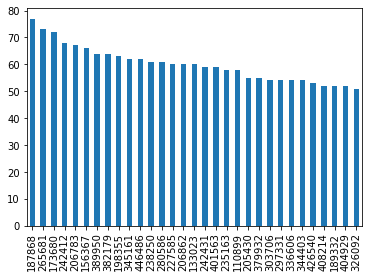

In [46]:
prevAppCounts[prevAppCounts >50].plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

#### Histogram of Number of previous applications for an ID

In [47]:
#what's this for?
sum(Pre_appsDF['SK_ID_CURR'].value_counts()==1)

60458

In [48]:
'''# Histogram of accumulated Number of previous applications
plt.hist(Pre_appsDF['SK_ID_CURR'].value_counts(), cumulative =True, bins = 100);
plt.grid()
plt.ylabel('cumulative number of IDs')
plt.xlabel('Number of previous applications per ID')
plt.title('Histogram of Number of previous applications for an ID')
'''

"# Histogram of accumulated Number of previous applications\nplt.hist(Pre_appsDF['SK_ID_CURR'].value_counts(), cumulative =True, bins = 100);\nplt.grid()\nplt.ylabel('cumulative number of IDs')\nplt.xlabel('Number of previous applications per ID')\nplt.title('Histogram of Number of previous applications for an ID')\n"

#### Previous loan rejection reasons

In [49]:
Pre_appsDF['CODE_REJECT_REASON'].nunique()

9

In [50]:
Pre_appsDF['CODE_REJECT_REASON'].value_counts()

XAP       1353093
HC         175231
LIMIT       55680
SCO         37467
CLIENT      26436
SCOFR       12811
XNA          5244
VERIF        3535
SYSTEM        717
Name: CODE_REJECT_REASON, dtype: int64

#### Previous loans status - Count of Approved and Rejected

In [51]:
Pre_appsDF['NAME_CONTRACT_STATUS'].value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

In [52]:
Pre_apps_all = Pre_appsDF['SK_ID_CURR'].nunique()
Pre_apps_5plus = Pre_appsDF['SK_ID_CURR'].value_counts()>=5
Pre_apps_40plus = Pre_appsDF['SK_ID_CURR'].value_counts()>=40
print('Percentage with 10 or more previous apps:', np.round(100.*(sum(Pre_apps_5plus)/Pre_apps_all),5))
print('Percentage with 40 or more previous apps:', np.round(100.*(sum(Pre_apps_40plus)/Pre_apps_all),5))

Percentage with 10 or more previous apps: 41.76895
Percentage with 40 or more previous apps: 0.03453


##### **Can we differentiate applications by low, medium and high previous apps?**
    * Low = <5 claims (22%)
    * Medium = 10 to 39 claims (58%)
    * High = 40 or more claims (20%)

### Installments Payments Dataset

In [53]:
instDF = datasets['installments_payments']

In [54]:
sum(instDF['SK_ID_CURR'].value_counts()==1)

972

In [55]:
len(np.intersect1d(datasets['installments_payments']["SK_ID_CURR"], datasets["application_train"]["SK_ID_CURR"]))

291643

In [56]:
instDF.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [57]:
instDF.describe()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360250e+07,1.360540e+07,1.360250e+07
mean,1.903365e+06,2.784449e+05,8.566373e-01,1.887090e+01,-1.042270e+03,-1.051114e+03,1.705091e+04,1.723822e+04
std,5.362029e+05,1.027183e+05,1.035216e+00,2.666407e+01,8.009463e+02,8.005859e+02,5.057025e+04,5.473578e+04
min,1.000001e+06,1.000010e+05,0.000000e+00,1.000000e+00,-2.922000e+03,-4.921000e+03,0.000000e+00,0.000000e+00
25%,1.434191e+06,1.896390e+05,0.000000e+00,4.000000e+00,-1.654000e+03,-1.662000e+03,4.226085e+03,3.398265e+03
50%,1.896520e+06,2.786850e+05,1.000000e+00,8.000000e+00,-8.180000e+02,-8.270000e+02,8.884080e+03,8.125515e+03
75%,2.369094e+06,3.675300e+05,1.000000e+00,1.900000e+01,-3.610000e+02,-3.700000e+02,1.671021e+04,1.610842e+04
max,2.843499e+06,4.562550e+05,1.780000e+02,2.770000e+02,-1.000000e+00,-1.000000e+00,3.771488e+06,3.771488e+06


### Credit Card balance dataset

In [58]:
ccbDF = datasets['credit_card_balance']

#### Number of clients on the application training data with credit card balance data

In [59]:
len(np.intersect1d(datasets['credit_card_balance']["SK_ID_CURR"], datasets["application_train"]["SK_ID_CURR"]))

86905

From the above, it can be seen that the credit card balance data is available only for 30% of the input training data. Imputing the missing values with mean may not be appropriate

In [60]:
ccbDF.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


### Bureau and Bureau Balance Datasets

In [61]:
burDF = datasets['bureau']
burbDF = datasets['bureau_balance']

In [62]:
burDF.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [63]:
burDF.shape

(1716428, 17)

In [64]:
print(len(np.intersect1d(burDF["SK_ID_CURR"], datasets["application_train"]["SK_ID_CURR"])))
print(round(len(np.intersect1d(burDF["SK_ID_CURR"], datasets["application_train"]["SK_ID_CURR"]))/len(np.unique(datasets["application_train"]["SK_ID_CURR"])),2))

263491
0.86


In [65]:
print(len(np.intersect1d(burDF["SK_ID_CURR"], datasets["application_test"]["SK_ID_CURR"])))
print(round(len(np.intersect1d(burDF["SK_ID_CURR"], datasets["application_test"]["SK_ID_CURR"]))/len(np.unique(datasets["application_test"]["SK_ID_CURR"])),2))

42320
0.87


Looking through some of the high-level numbers in the Bureau dataset, more than 85% of our applicants have information on this dataset, so it's definitely worth pursuing adding this information into the model.

In [66]:
burbDF.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [67]:
np.count_nonzero(burDF['CREDIT_DAY_OVERDUE'])/len(burDF['CREDIT_DAY_OVERDUE'])

0.0024568464275809996

Bureau Balance is a level of granularity on each credit that we do not need to be concerned with. We have only .2% of our population has overdue credits, so calculating out the number of individual months overdue isn't going to be of much benefit.

So now we will take a look at our various features and their distributions.

In [68]:
'''sns.countplot(burDF['CREDIT_ACTIVE'])'''

"sns.countplot(burDF['CREDIT_ACTIVE'])"

We've got a health number of obsevations in both active credit. We will be comfortable engineering features off of these subsets.

In [69]:
'''plt.hist(burDF['DAYS_CREDIT'],bins = 20)'''

"plt.hist(burDF['DAYS_CREDIT'],bins = 20)"

# Feature Engineering

## Engineering Features: Primary table - application_train

**Deriving new features from the training data:**
 
* ANNUITY_INCOME_PERCENT: the percentage of the loan annuity relative to a client's income
* CREDIT_TERM: the length of the payment in years
* DAYS_EMPLOYED_PERCENT: the percentage of the days employed relative to the client's age (after imputing anomalous values in 'DAYS_EMPLOYED')
* GOODS_PRICE_CREDIT_PERCENT: the percentage of the goods price relative to the loan credit amount
* INCOME_PER_FAM_MEMBERS: the income per family members
* TOTAL_ENQ_BUREAU: total number of enquiries to Credit Bureau 


In [70]:
class app_add_features(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): # no *args or **kargs
        self.features = features # no *args or **kargs
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X=pd.DataFrame(X, columns=self.features)
        X['ANNUITY_INCOME_PERCENT'] = X['AMT_ANNUITY'] / X['AMT_INCOME_TOTAL']
        X['CREDIT_TERM'] = X['AMT_CREDIT'] / X['AMT_ANNUITY']
        X['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
        X['AGE'] = X['DAYS_BIRTH'] / -365
        X['DAYS_EMPLOYED_PERCENT'] = X['DAYS_EMPLOYED'] / X['DAYS_BIRTH']
        X['GOODS_PRICE_CREDIT_PERCENT']=X['AMT_CREDIT'] / X['AMT_GOODS_PRICE']
        X['INCOME_PER_FAM_MEMBERS']=X['AMT_INCOME_TOTAL'] / X['CNT_FAM_MEMBERS']
        X['TOTAL_ENQ_BUREAU']=X['AMT_REQ_CREDIT_BUREAU_DAY']\
        +X['AMT_REQ_CREDIT_BUREAU_WEEK']\
        + X['AMT_REQ_CREDIT_BUREAU_MON']\
        + X['AMT_REQ_CREDIT_BUREAU_QRT']\
        + X['AMT_REQ_CREDIT_BUREAU_YEAR']
        X=X.replace([np.inf, -np.inf], np.nan)
        return X

In [71]:
'DAYS_BIRTH','DAYS_EMPLOYED','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'

('DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR')

In [72]:
'AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','DAYS_EMPLOYED','DAYS_BIRTH','AMT_CREDIT','AMT_GOODS_PRICE','AMT_INCOME_TOTAL','CNT_FAM_MEMBERS','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'

('AMT_ANNUITY',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'DAYS_EMPLOYED',
 'DAYS_BIRTH',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'AMT_INCOME_TOTAL',
 'CNT_FAM_MEMBERS',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR')

## Engineering Features: previous_application

**New features**
* Count of previous approved applications based on NAME_CONTRACT_STATUS
* Count of previous refused applications based on NAME_CONTRACT_STATUS
* Difference between applied and approved credit amount.
* Aggregate stats for 'AMT_ANNUITY'
* Aggregate stats for 'AMT_APPLICATION'
* Prev_GOODS_PRICE_CREDIT_PERCENT: the percentage of the goods price relative to the loan credit amount
* Prev_CREDIT_APP_PERCENTAGE: the percentage of the credit was granted relative to the loan was applied
* Group by the client id, calculate aggregation statistics

In [73]:
class prev_apps_add_features1(BaseEstimator, TransformerMixin):
    def __init__(self, feature=None): # no *args or **kargs
        self.feature = feature # no *args or **kargs
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X=pd.DataFrame(X)
        X['Pre_GOODS_PRICE_CREDIT_PERCENT']=X['AMT_CREDIT'] / X['AMT_GOODS_PRICE']
        X['Pre_CREDIT_APP_PERCENTAGE']=X['AMT_CREDIT'] / X['AMT_APPLICATION']
        X=X.replace([np.inf, -np.inf], np.nan)
    
        return X

In [74]:
class prev_apps_add_features2(BaseEstimator, TransformerMixin):
    def __init__(self, feature='text'): # no *args or **kargs
        self.feature = feature # no *args or **kargs
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X['Prev_appr_count'] = X['NAME_CONTRACT_STATUS'].map(lambda x: 1 if (x == 'Approved') else 0)
        X['Prev_rej_count'] = X['NAME_CONTRACT_STATUS'].map(lambda x: 1 if (x == 'Refused') else 0)
        X['Diff_credit_appr'] = X['AMT_APPLICATION'] - X['AMT_CREDIT'] 
        return X

In [75]:
# Create aggregate features (via pipeline)
class prevAppsFeaturesAggregater(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): # no *args or **kargs
        self.features = features
        self.agg_op_features = {}
        for f in features:
            if f not in (features[-1], features[-2]):
                self.agg_op_features[f] = {f"{f}_{func}":func for func in ["min", "max", "mean"]}
            else:
                self.agg_op_features[f] = {f"{f}_{func}":func for func in ["sum"]}

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit         
        result = X.groupby(["SK_ID_CURR"]).agg(self.agg_op_features)
        result.columns = result.columns.droplevel()
        result = result.reset_index(level=["SK_ID_CURR"])
        result['range_AMT_APPLICATION'] = result['AMT_APPLICATION_max'] - result['AMT_APPLICATION_min']
        return result # return dataframe with the join key "SK_ID_CURR"
    

In [76]:
'Pre_GOODS_PRICE_CREDIT_PERCENT', 'Pre_CREDIT_APP_PERCENTAGE','Prev_appr_count','Prev_rej_count','Diff_credit_appr'

('Pre_GOODS_PRICE_CREDIT_PERCENT',
 'Pre_CREDIT_APP_PERCENTAGE',
 'Prev_appr_count',
 'Prev_rej_count',
 'Diff_credit_appr')

## Engineering Features: Installment Payments

* Difference in AMT_INSTALMENT and AMT_PAYMENT
* Difference in DAYS_ENTRY_PAYMENT and DAYS_INSTALMENT

In [77]:
class instpmts_add_features1(BaseEstimator, TransformerMixin):
    def __init__(self, feature=None): # no *args or **kargs
        self.feature = feature # no *args or **kargs
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X['Diff_amt_paid'] = X['AMT_INSTALMENT'] - X['AMT_PAYMENT'] 
        X['Diff_pmt_days'] = X['DAYS_ENTRY_PAYMENT'] - X['DAYS_INSTALMENT'] 
        return X

In [78]:
# Create aggregate features (via pipeline)
class instpmntsFeaturesAggregater(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): # no *args or **kargs
        self.features = features
        self.agg_op_features = {}
        for f in features:
            self.agg_op_features[f] = {f"{f}_{func}":func for func in ["min", "max", "mean"]}
            
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit         
        result = X.groupby(["SK_ID_CURR"]).agg(self.agg_op_features)
        result.columns = result.columns.droplevel()
        result = result.reset_index(level=["SK_ID_CURR"])
        return result # return dataframe with the join key "SK_ID_CURR"

## Engineering Features: Credit Card Balance

* Credit Utilisation - AMT_BALANCE / AMT_CREDIT_LIMIT_ACTUAL
* Total number of Days past Due - SK_DPD_DEF

In [79]:
class crdcardbal_add_features1(BaseEstimator, TransformerMixin):
    def __init__(self, feature='text'): # no *args or **kargs
        self.feature = feature # no *args or **kargs
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        #X['Diff_amt_paid'] = X['AMT_INSTALMENT'] - X['AMT_PAYMENT'] 
        #X['Diff_pmt_days'] = X['DAYS_ENTRY_PAYMENT'] - X['DAYS_INSTALMENT'] 
        return X

In [80]:
# Create aggregate features (via pipeline)
class crdcardbalFeaturesAggregater(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): # no *args or **kargs
        self.features = features
        self.agg_op_features = {}
        for f in features:
            self.agg_op_features[f] = {f"{f}_{func}":func for func in ["sum"]}
            
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit         
        result = X.groupby(["SK_ID_CURR"]).agg(self.agg_op_features)
        result.columns = result.columns.droplevel()
        result = result.reset_index(level=["SK_ID_CURR"])
        result['Perc_Credit_util'] = np.round(result['AMT_BALANCE_sum'] / result['AMT_CREDIT_LIMIT_ACTUAL_sum'],3)
        result.drop(['AMT_BALANCE_sum', 'AMT_CREDIT_LIMIT_ACTUAL_sum'], axis=1, inplace=True)
        result=result.replace([np.inf, -np.inf], np.nan)
        result['SK_DPD_DEF_sum'].fillna(0, inplace=True)
        result['Perc_Credit_util'].fillna(0, inplace=True)
        return result # return dataframe with the join key "SK_ID_CURR"
    
    
#from sklearn.pipeline import make_pipeline 
#def test_driver_crecardbalFeaturesAggregater(df, features):
   # print(f"df.shape: {df.shape}\n")
   # print(f"df[{features}][0:5]: \n{df[features][0:5]}")
   # test_pipeline = make_pipeline(crdcardbalFeaturesAggregater(features))
   # return(test_pipeline.fit_transform(df))
         
#card_features = ['AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL', 'SK_DPD_DEF']
#res = test_driver_crecardbalFeaturesAggregater(ccbDF, card_features)
#print(f"HELLO")
#print(f"Test driver: \n{res[0:10]}")
#print(f"input[features][0:10]: \n{Pre_appsDF[0:10]}")


## Engineering Features: Bureau and Bureau Balance
We will engineer a few features. First, we'll get the total active credit and total debt for each consumer.  Then we will determine the most recent credit activity for each consumer.

In [81]:
class bur_add_features(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): # no *args or **kargs
        self.features = features # no *args or **kargs
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X,y=None):
        X['Total_Credit'] = X[X['CREDIT_ACTIVE'] == 'Active'].groupby('SK_ID_CURR')['AMT_CREDIT_SUM'].sum()
        X['Total_Debt'] = X.groupby('SK_ID_CURR')['AMT_CREDIT_SUM_DEBT'].sum()
        X['Most_Recent_Days_Credit'] = X[X['CREDIT_ACTIVE'] == 'Active'].groupby('SK_ID_CURR')['DAYS_CREDIT'].max()
        X['Total_Credit'].fillna(0, inplace=True)
        X['Total_Debt'].fillna(0, inplace=True)
        X['Most_Recent_Days_Credit'].fillna(0, inplace=True)
        return X

In [82]:
'Total_Credit','Total_Debt','Most_Recent_Days_Credit'

('Total_Credit', 'Total_Debt', 'Most_Recent_Days_Credit')

In [83]:
class bureauFeaturesAggregater(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): # no *args or **kargs
    
        self.features = features
        self.agg_op_features = {}
        for f in features:
            self.agg_op_features[f] = {f"{f}_{func}":func for func in ["mean"]}
            
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        
        result = X.groupby(["SK_ID_CURR"]).agg(self.agg_op_features)
        result.columns = result.columns.droplevel()
        result = result.reset_index(level=["SK_ID_CURR"])
        return result # return dataframe with the join key "SK_ID_CURR"
        
    

## Engineering Features: POS_CASH_balance

* Park it for Next round of EDA and Feature engineering

In [84]:
class pcbFeaturesAggregater(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): # no *args or **kargs
        self.features = features
        self.agg_op_features = {}
        for f in features:
            self.agg_op_features[f] = {f"{f}_{func}":func for func in ["sum"]}
            
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        result = X.groupby(["SK_ID_CURR"]).agg(self.agg_op_features)
        if len(result.columns.levels)>1:
            result.columns = result.columns.droplevel()
        result = result.reset_index(level=["SK_ID_CURR"])
        return result # return dataframe with the join key "SK_ID_CURR"
        
    

# Feature Engineering Pipeline

## Build Feature Engineering Pipelines

In [85]:
# Feature Engineering Pipeline for 'application_train'

Apps_feature_pipeline = Pipeline([('app_add_features', app_add_features()),])

In [86]:
# Feature Engineering Pipeline for 'previous_application'

prev_features = ['AMT_ANNUITY', 'AMT_APPLICATION', 'Diff_credit_appr', 'Pre_GOODS_PRICE_CREDIT_PERCENT', 'Pre_CREDIT_APP_PERCENTAGE', 'Prev_appr_count', 'Prev_rej_count']
prevApps_feature_pipeline = Pipeline([
        ('prev_apps_add_features1', prev_apps_add_features1()),
        ('prev_apps_add_features2', prev_apps_add_features2()),
        ('prevAppsFeaturesAggregater', prevAppsFeaturesAggregater(prev_features))
    ])

In [87]:
# Feature Engineering Pipeline for 'installments_payments'

inst_features = ['Diff_amt_paid', 'Diff_pmt_days']

instpmts_feature_pipeline = Pipeline([
        ('instpmt_add_features1', instpmts_add_features1()),  # add some new features 
        ('instpmt_aggregater', instpmntsFeaturesAggregater(inst_features)), # Aggregate across old and new features
    ])

In [88]:
# Feature Engineering Pipeline for 'credit_card_balance'

card_features = ['AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL', 'SK_DPD_DEF']
crdbal_feature_pipeline = Pipeline([
        ('crdcardbal_add_features1', crdcardbal_add_features1()),  # add some new features 
        ('crdbal_aggregater', crdcardbalFeaturesAggregater(card_features)), # Aggregate across old and new features
    ])

In [89]:
# Feature Engineering Pipeline for 'bureau'

bureau_features = ['Total_Credit','Total_Debt','Most_Recent_Days_Credit']
bu_feature_pipeline = Pipeline([('bur_add_features',bur_add_features()),
                                ('bureauFeaturesAggregater',bureauFeaturesAggregater(bureau_features)),
       ])

In [90]:
# Feature Engineering Pipeline for 'POS_CASH_balance'

#POS_CASH_balance_features = ['SK_ID_CURR']
#pcb_feature_pipeline = Pipeline([('pcbFeaturesAggregater',pcbFeaturesAggregater(POS_CASH_balance_features))
   #    ])

In [91]:
# Transform all the secondary tables

    prevApps_aggregated = prevApps_feature_pipeline.fit_transform(Pre_appsDF)

    instpmts_aggregated = instpmts_feature_pipeline.fit_transform(instDF)
    
    crecardbal_aggregated = crdbal_feature_pipeline.fit_transform(ccbDF)
    
    bureau_aggregated = bu_feature_pipeline.fit_transform(burDF,burbDF)
    
    #pcb_aggregated = pcb_feature_pipeline.fit_transform(pcbDF)
    
    

## Prepare the labeled dataset

### Select a subset of input features for baseline. Include the features most correlated with target

In [92]:
# transform datasets through feature engineering pipelines
selected_features = ['SK_ID_CURR','AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'AMT_CREDIT','DAYS_EMPLOYED','EXT_SOURCE_1',
        'EXT_SOURCE_2','EXT_SOURCE_3','CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
                   'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE','AMT_ANNUITY','AMT_GOODS_PRICE',
'CNT_FAM_MEMBERS','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR', 
                    'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH',
                   'REG_CITY_NOT_WORK_CITY', 'FLAG_EMP_PHONE', 'REG_CITY_NOT_LIVE_CITY', 'FLAG_DOCUMENT_3']

apps_train= datasets["application_train"][selected_features]#primary dataset
y=datasets["application_train"]["TARGET"]
Pre_appsDF = datasets["previous_application"] #prev app
instDF = datasets["installments_payments"]
ccbDF = datasets['credit_card_balance']
burDF = datasets['bureau']
burbDF = datasets['bureau_balance']
bur_burbDF=burDF.merge(burbDF,how='left', on='SK_ID_BUREAU')
pcbDF = datasets['POS_CASH_balance']

In [93]:
apps_train.shape

(307511, 31)

In [94]:
def prepare_datasets(X):
    
        
        X=Apps_feature_pipeline.transform(X)
        print("Xapp: ", X.shape)
        X=X.merge(prevApps_feature_pipeline.transform(Pre_appsDF), how='left', on='SK_ID_CURR')
        print("Xprevapp: ", X.shape)
        X=X.merge(instpmts_feature_pipeline.transform(instDF),how='left', on='SK_ID_CURR')
        print("Xinst: ", X.shape)
        X=X.merge(crdbal_feature_pipeline.transform(ccbDF),how='left', on='SK_ID_CURR')
        print("Xcrd: ", X.shape)
        X=X.merge(bu_feature_pipeline.transform(bur_burbDF),how='left', on='SK_ID_CURR')
        print("Xbu: ", X.shape)
        #X=X.merge(pcb_feature_pipeline.transform(pcbDF),how='left', on='SK_ID_CURR')
        X=X.drop(['DAYS_BIRTH', 'DAYS_EMPLOYED', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], axis=1)
        print("Xfinal: ", X.shape)
        return X



In [95]:
X= prepare_datasets(apps_train)

X.head()

Xapp:  (307511, 38)
Xprevapp:  (307511, 56)
Xinst:  (307511, 62)
Xcrd:  (307511, 64)
Xbu:  (307511, 67)
Xfinal:  (307511, 60)


,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,CODE_GENDER,FLAG_OWN_REALTY,FLAG_OWN_CAR,NAME_CONTRACT_TYPE,...,Diff_amt_paid_max,Diff_amt_paid_mean,Diff_pmt_days_min,Diff_pmt_days_max,Diff_pmt_days_mean,SK_DPD_DEF_sum,Perc_Credit_util,Total_Credit_mean,Total_Debt_mean,Most_Recent_Days_Credit_mean
0,100002,202500.0,406597.5,0.083037,0.262949,0.139376,M,Y,N,Cash loans,...,0.000,0.000000,-31.0,-12.0,-20.421053,NaN,NaN,0.0,0.0,0.0
1,100003,270000.0,1293502.5,0.311267,0.622246,NaN,F,N,N,Cash loans,...,0.000,0.000000,-14.0,-1.0,-7.160000,NaN,NaN,0.0,0.0,0.0
2,100004,67500.0,135000.0,NaN,0.555912,0.729567,M,Y,Y,Revolving loans,...,0.000,0.000000,-11.0,-3.0,-7.666667,NaN,NaN,0.0,0.0,0.0
3,100006,135000.0,312682.5,NaN,0.650442,NaN,F,Y,N,Cash loans,...,0.000,0.000000,-77.0,-1.0,-19.375000,0.0,0.0,NaN,NaN,NaN
4,100007,121500.0,513000.0,NaN,0.322738,NaN,M,Y,N,Cash loans,...,22655.655,452.384318,-31.0,12.0,-3.636364,NaN,NaN,0.0,0.0,0.0


In [96]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)


In [97]:
#X_train['']

## Prepare the unlabeled dataset (i.e., the Kaggle test dataset)

In [98]:
# with all features, shall we do the same thing as application_train?
X_kaggle_test= datasets["application_test"][selected_features]

prepared_kaggle_test= prepare_datasets(X_kaggle_test)

prepared_kaggle_test.head()

Xapp:  (48744, 38)
Xprevapp:  (48744, 56)
Xinst:  (48744, 62)
Xcrd:  (48744, 64)
Xbu:  (48744, 67)
Xfinal:  (48744, 60)


,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,CODE_GENDER,FLAG_OWN_REALTY,FLAG_OWN_CAR,NAME_CONTRACT_TYPE,...,Diff_amt_paid_max,Diff_amt_paid_mean,Diff_pmt_days_min,Diff_pmt_days_max,Diff_pmt_days_mean,SK_DPD_DEF_sum,Perc_Credit_util,Total_Credit_mean,Total_Debt_mean,Most_Recent_Days_Credit_mean
0,100001,135000.0,568800.0,0.752614,0.789654,0.159520,F,Y,N,Cash loans,...,0.00,0.000000,-36.0,11.0,-7.285714,NaN,NaN,0.0,0.0,0.0
1,100005,99000.0,222768.0,0.564990,0.291656,0.432962,M,Y,N,Cash loans,...,0.00,0.000000,-37.0,1.0,-23.555556,NaN,NaN,0.0,0.0,0.0
2,100013,202500.0,663264.0,NaN,0.699787,0.610991,M,Y,Y,Cash loans,...,23147.82,1157.662742,-38.0,21.0,-5.180645,1.0,0.138,0.0,0.0,0.0
3,100028,315000.0,1575000.0,0.525734,0.509677,0.612704,F,Y,N,Cash loans,...,8505.00,622.550708,-19.0,7.0,-3.000000,0.0,0.036,0.0,0.0,0.0
4,100038,180000.0,625500.0,0.202145,0.425687,NaN,M,N,Y,Cash loans,...,0.00,0.000000,-18.0,-9.0,-12.250000,NaN,NaN,NaN,NaN,NaN


# Processing pipeline

In [99]:
num_features = X_train.select_dtypes(exclude=['object']).columns.tolist()


In [100]:
len(num_features)

53

In [101]:
cat_features = X_train.select_dtypes('object').columns.tolist()
cat_features

['CODE_GENDER',
 'FLAG_OWN_REALTY',
 'FLAG_OWN_CAR',
 'NAME_CONTRACT_TYPE',
 'NAME_EDUCATION_TYPE',
 'OCCUPATION_TYPE',
 'NAME_INCOME_TYPE']

In [102]:
len(cat_features)

7

In [103]:
# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [104]:
# Identify the numeric features we wish to consider. 
num_attribs = num_features

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy='mean')),
        ('std_scaler', StandardScaler()),
    ])

# Identify the categorical features we wish to consider.
cat_attribs = cat_features

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

data_prep_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])
              



# Baseline Model

To get a baseline, we will use some of the features after being preprocessed through the pipeline.
The baseline model is a logistic regression model

In [105]:
def pct(x):
    return round(100*x,3)

In [106]:
try:
    expLog
except NameError:
    expLog = pd.DataFrame(columns=["exp_name", 
                                   "Train Acc", 
                                   "Valid Acc",
                                   "Test  Acc",
                                   "Train AUC", 
                                   "Valid AUC",
                                   "Test  AUC"
                                  ])


In [107]:
#
'''%%time 
np.random.seed(42)
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("logistic", LogisticRegression())
    ])'''

'%%time \nnp.random.seed(42)\nfull_pipeline_with_predictor = Pipeline([\n        ("preparation", data_prep_pipeline),\n        ("logistic", LogisticRegression())\n    ])'

In [108]:
#
'''model = full_pipeline_with_predictor.fit(X_train, y_train)'''

UsageError: Line magic function `%%time` not found.


In [ ]:
#
'''from sklearn.metrics import accuracy_score

np.round(accuracy_score(y_train, model.predict(X_train)), 3)'''

## Evaluation metrics
Submissions are evaluated on [area under the ROC curve](http://en.wikipedia.org/wiki/Receiver_operating_characteristic) between the predicted probability and the observed target.

The SkLearn `roc_auc_score` function computes the area under the receiver operating characteristic (ROC) curve, which is also denoted by AUC or AUROC. By computing the area under the roc curve, the curve information is summarized in one number. 

```python
from sklearn.metrics import roc_auc_score
>>> y_true = np.array([0, 0, 1, 1])
>>> y_scores = np.array([0.1, 0.4, 0.35, 0.8])
>>> roc_auc_score(y_true, y_scores)
0.75
```

In [109]:
from sklearn.metrics import roc_auc_score


In [ ]:
#
'''exp_name = f"Baseline_60_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model.predict(X_train)), 
                accuracy_score(y_valid, model.predict(X_valid)),
                accuracy_score(y_test, model.predict(X_test)),
                roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])],
    4)) 
expLog'''

## Feature Selection: P-Values

In [159]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif
from sklearn.preprocessing import Normalizer

In [114]:
#shrink train size for testing
#X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=.9, random_state=42)

### F-Test

In [162]:
prep_and_ftest_pipeline = Pipeline([
    ('preparation', data_prep_pipeline),
    ('feature_selection', SelectKBest(score_func=f_classif, k='all'))
])

In [116]:
%%time
ftest_model = prep_and_ftest_pipeline.fit(X_train, y_train)

Wall time: 1.36 s


In [123]:
ftest_scores = prep_and_ftest_pipeline.named_steps['feature_selection'].scores_
ftest_pvalues = prep_and_ftest_pipeline.named_steps['feature_selection'].pvalues_
len(ftest_pvalues)

92

In [125]:
num_names = prep_and_ftest_pipeline.named_steps['preparation'].transformer_list[0][1][0].attribute_names
num_names = num_names

In [126]:
cat_names = prep_and_ftest_pipeline.named_steps['preparation'].transformer_list[1][1][2].get_feature_names()

In [127]:
feature_names = []
feature_names.extend(num_names)
feature_names.extend(cat_names)
len(feature_names)

92

In [133]:
ftest_all = pd.DataFrame(list(zip(feature_names, ftest_scores, ftest_pvalues)), columns=['feature', 'f value', 'p-value'])

In [140]:
ftest_all.sort_values('p-value')

,feature,f value,p-value
4,EXT_SOURCE_2,658.019262,4.861172e-143
5,EXT_SOURCE_3,610.163939,6.395938e-133
3,EXT_SOURCE_1,189.353067,6.601285e-43
19,AGE,119.042314,1.204963e-27
49,Perc_Credit_util,110.273621,9.807214e-26
...,...,...,...
57,x1_Y,0.152571,6.960945e-01
55,x0_XNA,0.088478,7.661237e-01
46,Diff_pmt_days_max,0.082587,7.738245e-01
28,AMT_APPLICATION_max,0.068842,7.930328e-01


### Chi-Squared Test

In [152]:
prep_and_chi2_pipeline = Pipeline([
    ('preparation', data_prep_pipeline),
    ('normalizer', MinMaxScaler()),
    ('feature_selection', SelectKBest(score_func=chi2, k='all'))
])

In [153]:
%%time
chi2_model = prep_and_chi2_pipeline.fit_transform(X_train, y_train)

Wall time: 1.21 s


In [154]:
chi2_scores = prep_and_chi2_pipeline.named_steps['feature_selection'].scores_
chi2_pvalues = prep_and_chi2_pipeline.named_steps['feature_selection'].pvalues_
len(chi2_pvalues)

92

In [157]:
chi2_all = pd.DataFrame(list(zip(feature_names, chi2_scores, chi2_pvalues)), columns=['feature', 'chi2 value', 'p-value'])
chi2_all.sort_values('p-value')

,feature,chi2 value,p-value
4,EXT_SOURCE_2,52.788854,3.714030e-13
63,x4_Higher education,50.075173,1.479673e-12
54,x0_M,42.733288,6.273557e-11
5,EXT_SOURCE_3,40.297046,2.181385e-10
13,REG_CITY_NOT_WORK_CITY,38.853025,4.569453e-10
...,...,...,...
31,Diff_credit_appr_max,0.004651,9.456273e-01
51,Total_Debt_mean,0.004467,9.467103e-01
42,Diff_amt_paid_min,0.003344,9.538865e-01
45,Diff_pmt_days_min,0.000573,9.808997e-01


### Mutual Information

In [175]:
prep_and_mi_pipeline = Pipeline([
    ('preparation', data_prep_pipeline),
    ('feature_selection', SelectKBest(score_func=mutual_info_classif, k='all'))
])

In [164]:
%%time
mi_model = prep_and_mi_pipeline.fit_transform(X_train, y_train)

Wall time: 24.9 s


In [171]:
mi_scores = prep_and_mi_pipeline.named_steps['feature_selection'].scores_
len(mi_scores)

92

In [173]:
mi_all = pd.DataFrame(list(zip(feature_names, mi_scores)), columns=['feature', 'mutual info'])
mi_all.sort_values('mutual info', ascending=False)

,feature,mutual info
18,CREDIT_TERM,0.018305
4,EXT_SOURCE_2,0.014912
5,EXT_SOURCE_3,0.013180
6,AMT_ANNUITY,0.008704
60,x3_Cash loans,0.006708
...,...,...
26,AMT_ANNUITY_mean,0.000000
30,Diff_credit_appr_min,0.000000
50,Total_Credit_mean,0.000000
32,Diff_credit_appr_mean,0.000000


## Hyperparameter Tuning

In [159]:
this is a codebreak

from sklearn.model_selection import GridSearchCV

param_grid = {'logistic__penalty':['l1','l2'], 
              'logistic__tol': (0.0001, 0.00001), 
              'logistic__C': [0.1, 1, 10]
             }

gs = GridSearchCV(full_pipeline_with_predictor, param_grid, cv=5,n_jobs=48) 

SyntaxError: invalid syntax (<ipython-input-159-494e10cdfbda>, line 1)

In [ ]:
gs.fit(X_train, y_train)

In [ ]:
gs.best_params_

In [ ]:
from sklearn.metrics import roc_auc_score
exp_name = f"60_features_{gs.best_params_}"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, gs.predict(X_train)), 
                accuracy_score(y_valid, gs.predict(X_valid)),
                accuracy_score(y_test, gs.predict(X_test)),
                roc_auc_score(y_train, gs.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, gs.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, gs.predict_proba(X_test)[:, 1])],
    4)) 
expLog

## Submission File Prep

For each SK_ID_CURR in the test set, you must predict a probability for the TARGET variable. The file should contain a header and have the following format:

```python 
SK_ID_CURR,TARGET
100001,0.1
100005,0.9
100013,0.2
etc.
```

In [ ]:
test_class_scores = model.predict_proba(prepared_kaggle_test)[:, 1]

In [ ]:
test_class_scores[0:10]

In [ ]:
# Submission dataframe
submit_df = datasets["application_test"][['SK_ID_CURR']]
submit_df['TARGET'] = test_class_scores

submit_df.head()

In [ ]:
submit_df.to_csv("submission.csv",index=False)

# Kaggle submission via the command line API

In [ ]:
! kaggle competitions submit -c home-credit-default-risk -f submission.csv -m "baseline submission"

## report submission

Click on this [link](https://www.kaggle.com/c/home-credit-default-risk/submissions?sortBy=date&group=all&page=1)

Home Credit Default Risk | Kaggle 2019-11-17 09-02-32.png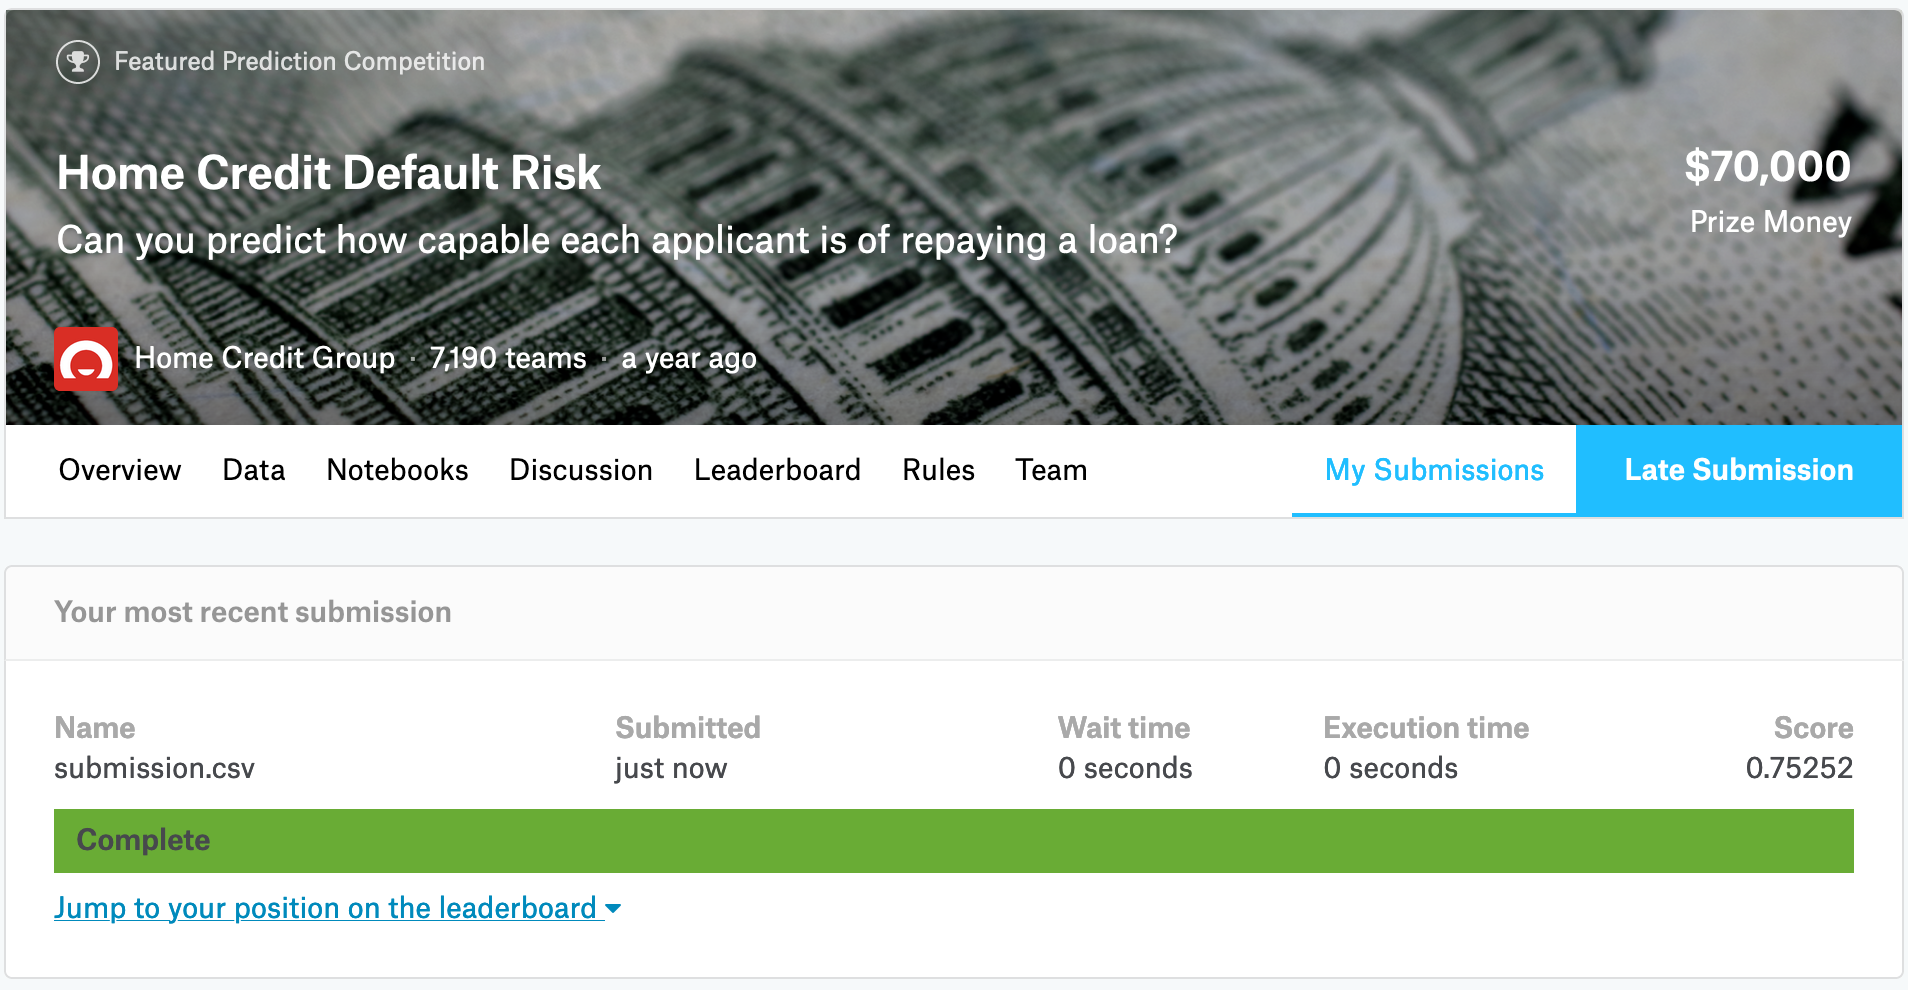

# Write-up 
For this phase of the project, you will need to submit a write-up summarizing the work you did. 
The write-up form is available on Canvas (Modules-> Module 12.1 - Course Project - Home Credit Default Risk (HCDR)-> FP Phase 2 (HCDR) : write-up form ). It has the following sections: 
## Abstract
Please provide an abstract summarizing the work you did (150 words)
## Introduction
## Feature Engineering and transformers
Please explain the work you conducted on feature engineering and transformers. 
Please include code sections when necessary as well as images or any relevant material
## Pipelines
Please explain the pipelines you created for this project and how you used them
Please include code sections when necessary as well as images or any relevant material
## Experimental results
Please present the results of the various experiments that you conducted. The results should be shown in a table or image. Try to include the different details for each experiment.  

Please include code sections when necessary as well as images or any relevant material
## Discussion
Discuss  & analyze your different experimental results  

Please include code sections when necessary as well as images or any relevant material
## Conclusion
## Kaggle Submission
Please provide a screenshot of your best kaggle submission.   
The screenshot should show the different details of the submission and not just the score.

# References

Some of the material in this notebook has been adopted from [here](https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction/notebook)


In [ ]:
# Convert categorical features to numerical approximations (via pipeline)
class ClaimAttributesAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None): 
        charlson_idx_dt = {'0': 0, '1-2': 2, '3-4': 4, '5+': 6}
        los_dt = {'1 day': 1, '2 days': 2, '3 days': 3, '4 days': 4, '5 days': 5, '6 days': 6,
          '1- 2 weeks': 11, '2- 4 weeks': 21, '4- 8 weeks': 42, '26+ weeks': 180}
        X['PayDelay'] = X['PayDelay'].apply(lambda x: int(x) if x != '162+' else int(162))
        X['DSFS'] = X['DSFS'].apply(lambda x: None if pd.isnull(x) else int(x[0]) + 1)
        X['CharlsonIndex'] = X['CharlsonIndex'].apply(lambda x: charlson_idx_dt[x])
        X['LengthOfStay'] = X['LengthOfStay'].apply(lambda x: None if pd.isnull(x) else los_dt[x])
        return X
    
    


In [ ]:
# Split the provided training data into training and validationa and test
# The kaggle evaluation test set has no labels
#
from sklearn.model_selection import train_test_split

use_application_data_ONLY = False #use joined data
if use_application_data_ONLY:
    # just selected a few features for a baseline experiment
    selected_features = ['AMT_INCOME_TOTAL',  'AMT_CREDIT','DAYS_EMPLOYED','DAYS_BIRTH','EXT_SOURCE_1',
        'EXT_SOURCE_2','EXT_SOURCE_3','CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
                   'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']
    X_train = datasets["application_train"][selected_features]
    y_train = datasets["application_train"]['TARGET']
    X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
    X_kaggle_test= datasets["application_test"][selected_features]
    # y_test = datasets["application_test"]['TARGET']   #why no  TARGET?!! (hint: kaggle competition)

selected_features = ['AMT_INCOME_TOTAL',  'AMT_CREDIT','DAYS_EMPLOYED','DAYS_BIRTH','EXT_SOURCE_1',
        'EXT_SOURCE_2','EXT_SOURCE_3','CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
                   'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE']
y_train = X_train['TARGET']
X_train = X_train[selected_features]
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)
X_kaggle_test= X_kaggle_test[selected_features]
# y_test = datasets["application_test"]['TARGET']   #why no  TARGET?!! (hint: kaggle competition)

    
print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")
print(f"X X_kaggle_test   shape: {X_kaggle_test.shape}")

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
import re

# Creates the following date features
# But could do so much more with these features
#    E.g., 
#      extract the domain address of the homepage and OneHotEncode it
# 
# ['release_month','release_day','release_year', 'release_dayofweek','release_quarter']
class prep_OCCUPATION_TYPE(BaseEstimator, TransformerMixin):
    def __init__(self, features="OCCUPATION_TYPE"): # no *args or **kargs
        self.features = features
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        df = pd.DataFrame(X, columns=self.features)
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit         
        df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].apply(lambda x: 1. if x in ['Core Staff', 'Accountants', 'Managers', 'Sales Staff', 'Medicine Staff', 'High Skill Tech Staff', 'Realty Agents', 'IT Staff', 'HR Staff'] else 0.)   
        #df.drop(self.features, axis=1, inplace=True)
        return np.array(df.values)  #return a Numpy Array to observe the pipeline protocol
    

from sklearn.pipeline import make_pipeline 
features = ["OCCUPATION_TYPE"]
def test_driver_prep_OCCUPATION_TYPE():
    print(f"X_train.shape: {X_train.shape}\n")
    print(f"X_train['name'][0:5]: \n{X_train[features][0:5]}")
    test_pipeline = make_pipeline(prep_OCCUPATION_TYPE(features))
    return(test_pipeline.fit_transform(X_train))
          
x = test_driver_prep_OCCUPATION_TYPE()
print(f"Test driver: \n{test_driver_prep_OCCUPATION_TYPE()[0:10, :]}")
print(f"X_train['name'][0:10]: \n{X_train[features][0:10]}")


# QUESTION, should we lower case df['OCCUPATION_TYPE'] as Sales staff != 'Sales Staff'? (hint: YES)
